In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/cssws2023


Mounted at /content/drive
/content/drive/MyDrive/cssws2023


### 準備
- 必要なライブラリとデータを読み込みます。

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
dat = pd.read_csv('data/kokkai_corona.csv')

In [5]:
#出席者の名前を記録しているだけの発言を除く
dat = dat.query('speaker != "会議録情報" ')

In [6]:
import pickle
with open('data/bow.pickle','rb') as f:
    bow = pickle.load(f)

### データの加工
- 削除などでインデックスが欠番しているので、rest_index()をしてから、分かち書きのデータ（データシリーズ）を元のデータフレームに列変数として加えます。
- 政党ごとの分析ができるように新しい政党カテゴリを作ります。

In [7]:
dat = dat.reset_index(drop=True)

In [8]:
dat['bow'] = bow.reset_index(drop=True)

In [9]:
dat.head()

,speechID,issueID,imageKind,searchObject,session,nameOfHouse,nameOfMeeting,issue,date,closing,...,speakerYomi,speakerGroup,speakerPosition,speakerRole,speech,startPage,speechURL,meetingURL,pdfURL,bow
0,121104601X01020230413_038,121104601X01020230413,会議録,38,211,衆議院,総務委員会,第10号,2023-04-13,NaN,...,なかつかひろし,日本維新の会,NaN,NaN,○中司委員 考え方はよく分かりました。よろしくお願いいたします。\n そこで、オンラインによ...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[オンライン, 議会, 参画, 多様, 人材, 確保, 重要, テーマ, 地方公共団体, デ..."
1,121104601X01020230413_099,121104601X01020230413,会議録,99,211,衆議院,総務委員会,第10号,2023-04-13,NaN,...,おおつきくれは,立憲民主党・無所属,NaN,NaN,○おおつき委員 一人の議員の不祥事による補欠選挙で二億円以上のお金がかかる。これは、ちゃんと...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[一人, 不祥事, 補欠選挙, 2億円, お金, 有権者, 理解, 補欠選挙, 物価高, 選..."
2,121104601X01020230413_119,121104601X01020230413,会議録,119,211,衆議院,総務委員会,第10号,2023-04-13,NaN,...,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 今の御答弁の中でございましたけれども、各地域、選挙管理委員会においては様々なお取...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[地域, 選挙管理委員会, 様々, 取組, 取組, 財政, 質問, 3年, 新型コロナウイル..."
3,121104601X01020230413_123,121104601X01020230413,会議録,123,211,衆議院,総務委員会,第10号,2023-04-13,NaN,...,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 続きまして、更なる質問になりますけれども、地方議会におけるオンライン開催への取組...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[更, 質問, 地方議会, オンライン, 開催, 取組, 今年2月, 総務省, 本会議, 質..."
4,121104601X01020230413_129,121104601X01020230413,会議録,129,211,衆議院,総務委員会,第10号,2023-04-13,NaN,...,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 引き続きの待遇改善、処遇改善に是非御尽力いただきたいと思います。\n 最後の質問...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[待遇改善, 処遇, 改善, 是非, 尽力, 質問, 地方公務員, 定例, 業務, コロナ,..."


In [10]:
dat['speakerGroup'].unique()

array(['日本維新の会', '立憲民主党・無所属', '国民民主党・無所属クラブ', nan, '自由民主党・無所属の会',
       'れいわ新選組', '公明党', '立憲民主・社民', '日本共産党', '自由民主党', '各派に属しない議員', '有志の会',
       '国民民主党・新緑風会', '政治家女子48党', 'NHK党', '無所属', '沖縄の風', '自由民主党・国民の声',
       '碧水会', 'みんなの党', '日本維新の会・無所属の会', '立憲民主党・社民・無所属', '立憲民主・国民・社民・無所属',
       '立憲・国民．新緑風会・社民', '立憲民主・国民・社保・無所属フォーラム', '希望の党'], dtype=object)

In [11]:
dat['speakerGroup2'] = 'その他'
dat.loc[dat['speakerGroup'].str.contains('立憲').fillna(False),'speakerGroup2'] = '立憲民主党'
dat.loc[dat['speakerGroup'].str.contains('自由民主党').fillna(False),'speakerGroup2'] = '自由民主党'
dat.loc[dat['speakerGroup'].str.contains('日本維新の会').fillna(False),'speakerGroup2'] = '日本維新の会'
dat.loc[dat['speakerGroup'].str.contains('日本共産党').fillna(False),'speakerGroup2'] = '日本共産党'

#dat.loc[dat['speakerGroup2'].str.contains('みんなの党|各派に属しない議員|希望の党|沖縄の風|国民民主党・新緑風会|碧水会|無所属|れいわ新選組').fillna(False),'speakerGroup2'] = 'その他'

### 頻度分析
- 頻出語の数を数えるのはテクスト分析の基本です。
- collectionライブラリのCounterを使います。
- そのために分かち書き文書のリストを一次元リストにします。
- ワードクラウドによる可視化をします。

In [12]:
bow.head()

0    [オンライン, 議会, 参画, 多様, 人材, 確保, 重要, テーマ, 地方公共団体, デ...
1    [一人, 不祥事, 補欠選挙, 2億円, お金, 有権者, 理解, 補欠選挙, 物価高, 選...
2    [地域, 選挙管理委員会, 様々, 取組, 取組, 財政, 質問, 3年, 新型コロナウイル...
3    [更, 質問, 地方議会, オンライン, 開催, 取組, 今年2月, 総務省, 本会議, 質...
4    [待遇改善, 処遇, 改善, 是非, 尽力, 質問, 地方公務員, 定例, 業務, コロナ,...
Name: speech, dtype: object

In [13]:
bow1d = [word for word_list_for_each in dat['bow'].tolist() for word in word_list_for_each]#1次元リストにする

In [14]:
bow1d

['オンライン',
 '議会',
 '参画',
 '多様',
 '人材',
 '確保',
 '重要',
 'テーマ',
 '地方公共団体',
 'デジタル化',
 '推進',
 '一環',
 '問題',
 '大阪',
 '出端',
 '府',
 '市',
 '委員会',
 '質問',
 '地方議会',
 'オンライン',
 '参加',
 '自治体',
 '条例',
 '本会議',
 '地方自治法',
 'オンライン',
 '開催',
 '法改正',
 '必要',
 '党',
 '法案',
 '提出',
 '出産',
 '育児',
 '介護',
 '障害',
 '議会',
 '活動',
 '困難',
 '多様',
 '人材',
 'オンライン',
 '参画',
 '明白',
 'コロナ禍',
 '現実',
 '問題',
 'ぱんでみっく!!',
 '大規模',
 '災害',
 '非常事態',
 '直面',
 '議会',
 '機能',
 '維持',
 '観点',
 '重要',
 '地方制度調査会',
 '答申',
 '本会議',
 'オンライン',
 '開催',
 '丁寧',
 '検討',
 '改正',
 '請願',
 '意見書',
 '手続',
 'オンライン',
 '前進',
 'ゴール',
 '議決',
 '本会議',
 '開催',
 'オンライン',
 '早期',
 'これだけ',
 'オンライン',
 '道筋',
 '見解',
 '一人',
 '不祥事',
 '補欠選挙',
 '2億円',
 'お金',
 '有権者',
 '理解',
 '補欠選挙',
 '物価高',
 '選挙公報',
 '印刷',
 '配布',
 '費用',
 '上昇',
 'パーティー',
 '収支',
 '政治資金収支報告書',
 '4000万円',
 '記載',
 '疑惑',
 '流用',
 '説明',
 '税金の無駄遣い',
 '反省',
 '公募',
 '円',
 '選挙',
 '私たち',
 '立憲民主党',
 '政治',
 '金',
 '問題',
 '徹底的',
 '質問',
 '先月',
 '閣議',
 '決定',
 '国会',
 '提出',
 '生活',
 '衛生',
 '関係',
 '行政',
 '機能',
 '強化',
 '関係',
 '法律',
 '整備',
 '法律案

In [15]:
freq = Counter(bow1d)
freq

Counter({'オンライン': 2721,
         '議会': 437,
         '参画': 353,
         '多様': 1403,
         '人材': 2516,
         '確保': 13525,
         '重要': 13574,
         'テーマ': 878,
         '地方公共団体': 1560,
         'デジタル化': 2324,
         '推進': 7716,
         '一環': 358,
         '問題': 14102,
         '大阪': 1481,
         '出端': 1449,
         '府': 596,
         '市': 558,
         '委員会': 3125,
         '質問': 13904,
         '地方議会': 191,
         '参加': 2087,
         '自治体': 8297,
         '条例': 269,
         '本会議': 668,
         '地方自治法': 102,
         '開催': 3665,
         '法改正': 1091,
         '必要': 27073,
         '党': 1759,
         '法案': 6137,
         '提出': 4400,
         '出産': 675,
         '育児': 362,
         '介護': 2478,
         '障害': 1360,
         '活動': 3497,
         '困難': 3027,
         '明白': 85,
         'コロナ禍': 9182,
         '現実': 1570,
         'ぱんでみっく!!': 806,
         '大規模': 1680,
         '災害': 3154,
         '非常事態': 145,
         '直面': 1242,
         '機能': 4261,
         '維持': 37

In [16]:
freq = pd.DataFrame.from_dict(freq,orient='index',columns = ['count'])
top100 = freq.sort_values('count',ascending=False)[:100]
top100

,count
必要,27073
支援,26975
対応,26730
状況,26010
対策,24163
...,...
要請,4479
補正予算,4472
相談,4441
提出,4400


from matplotlib import pyplot as plt
top100['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 24517 (\N{CJK UNIFIED IDEOGRAPH-5FC5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26619 (\N{CJK UNIFIED IDE

from matplotlib import pyplot as plt
top100['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
#ワードクラウドで日本語フォントを使うためにインストールする
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (6,687 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
def plot_wordcloud(freq):
  result = WordCloud(width=800, height=600, background_color='white', font_path=font_path_gothic,regexp=r"[\w']+").generate(' ' .join(freq.index))
  plt.figure(figsize=(12,10))
  plt.imshow(result)
  plt.axis('off')
  plt.show()


In [19]:
def frequency(bow, num = None):#bowは2次元リスト
  bow1d = [word for word_list_for_each in bow for word in word_list_for_each]#1次元リストにする
  freq = Counter(bow1d)
  freq = pd.DataFrame.from_dict(freq,orient='index',columns = ['count'])
  if num:
    top = freq.sort_values('count',ascending=False)[:num]
  else:
    top = freq.sort_values('count',ascending=False)
  return top

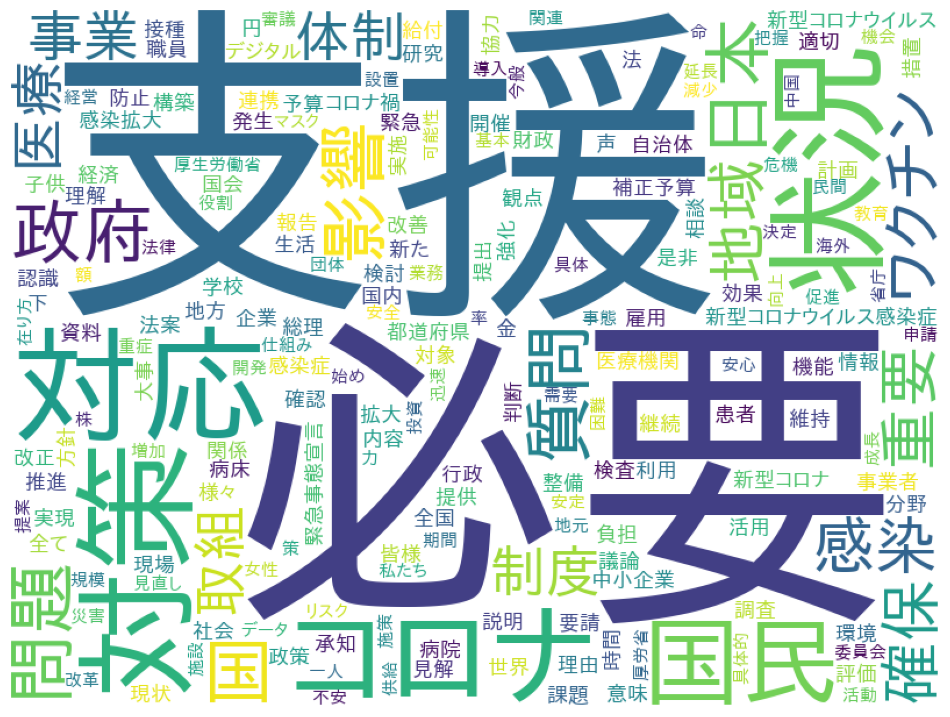

In [20]:
freq = frequency(dat['bow'].tolist(),1000)
plot_wordcloud(freq)

### 政党ごとの分析
- 政党ごとのテキストの特徴を分析します。
- まず、単純に政党ごとの語の頻度分析をしてみます。
- このやり方ではあまり特徴がつかめませんでした。

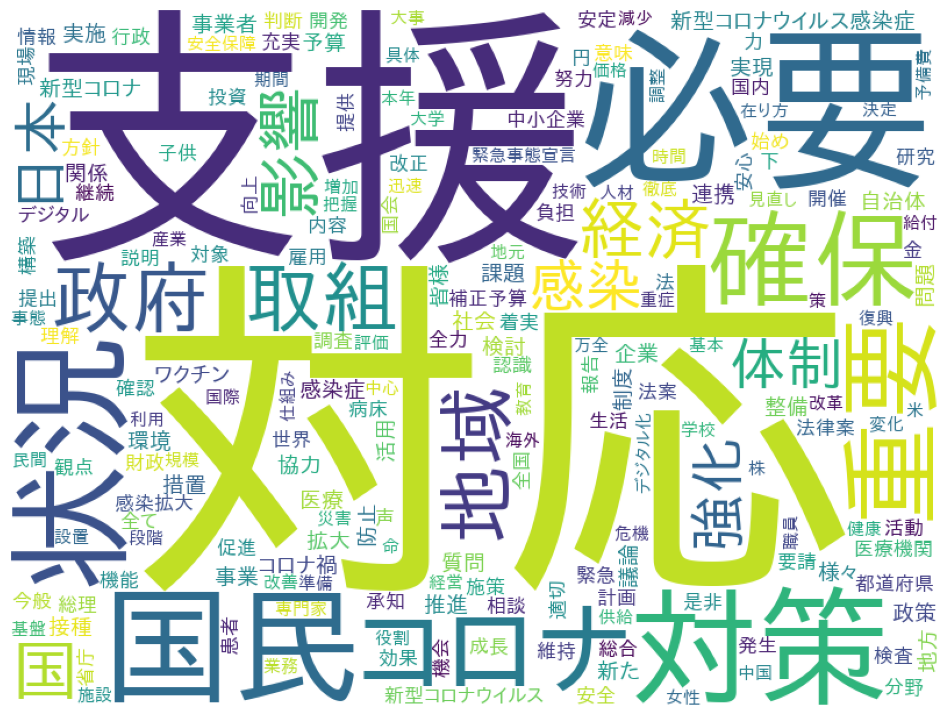

In [21]:
jimin = frequency(dat.query('speakerGroup2=="自由民主党"')['bow'].tolist(),num = 1000)
plot_wordcloud(jimin)

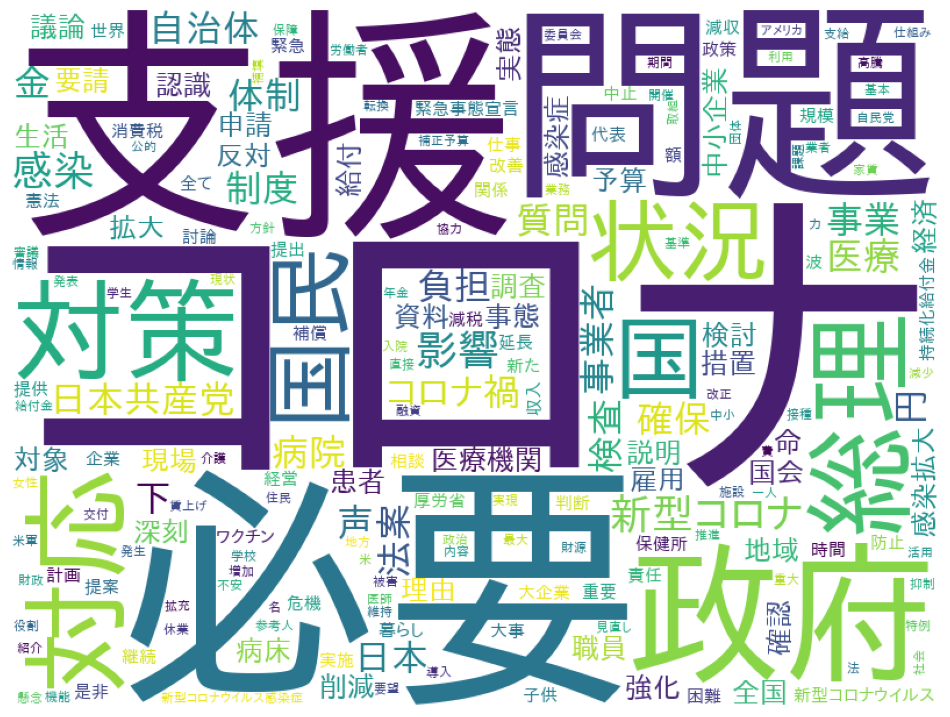

In [22]:
kyousan = frequency(dat.query('speakerGroup2=="日本共産党"')['bow'].tolist(), num = 1000)
plot_wordcloud(kyousan)

#### 識別語分析
- 語1の識別スコア = xにおける語1の相対的頻度（xの全語彙を分母として語1の頻度） - yにおける語1の相対的頻度（yの全語彙を分母として語1の頻度）とする。
- 識別スコアの高い語ほど、その集団を特徴付ける語といえる。
- e.g. Nelson (2021)

In [23]:
def discriminating_words(x, y):
  vx = frequency(x)
  vx  = vx / len(vx)#相対頻度の計算
  vy = frequency(y)
  vy = vy/ len(vy)#相対頻度の計算
  freq = pd.merge(vx,vy, left_index=True,right_index=True)#vx,vyのindexは単語なのでindexをそろえてマージをする。
  freq['difference'] = freq['count_x'] - freq['count_y']#それぞれの相対頻度を引けば、そのindex語の識別スコアが計算できる。
  return freq['difference']



In [24]:
pd.options.display.max_rows = 100

x = dat.query('speakerGroup2=="自由民主党"')['bow'].tolist()
y = dat.query('speakerGroup2=="日本共産党"')['bow'].tolist()


In [25]:
discriminating_words(x,y).sort_values().head(100)#日本共産党

日本共産党     -0.044721
反対        -0.022783
討論        -0.013151
減税        -0.012058
減収        -0.010494
資料        -0.009992
削減        -0.009921
改憲        -0.009198
補償        -0.009081
病院        -0.008877
大企業       -0.008844
米軍        -0.008612
消費税       -0.008214
撤回        -0.007427
原発        -0.007105
実態        -0.006800
中止        -0.006729
増税        -0.006604
重大        -0.006360
補填        -0.006272
富裕層       -0.006117
深刻        -0.005927
家賃        -0.005447
保障        -0.005332
基地建設      -0.005006
強行        -0.004975
事件        -0.004960
持続化給付金    -0.004817
安倍政権      -0.004765
生活保護      -0.004723
軍事費       -0.004687
紹介        -0.004666
内部留保      -0.004456
拒否        -0.004333
強調        -0.004307
廃業        -0.004159
代表        -0.004051
営業        -0.004050
後遺症       -0.003996
巨額        -0.003933
リストラ      -0.003925
結局        -0.003918
アンケート     -0.003875
波         -0.003728
学費        -0.003543
疑惑        -0.003534
シフト       -0.003503
業者        -0.003474
逆行        -0.003452
参考人       -0.003354


In [26]:
discriminating_words(x,y).sort_values(ascending = False).head(100)#自由民主党

対応              0.318553
支援              0.252197
状況              0.235677
対策              0.227014
必要              0.201400
重要              0.167295
取組              0.167114
国民              0.149883
経済              0.147592
地域              0.146494
確保              0.146373
新型コロナウイルス感染症    0.130864
連携              0.129819
強化              0.124597
課題              0.123242
推進              0.121067
関係              0.118260
影響              0.118060
実施              0.117429
ワクチン            0.116441
体制              0.113148
実現              0.112604
皆様              0.110823
整備              0.110341
活用              0.109122
日本              0.108989
感染              0.108710
国               0.108208
様々              0.105083
措置              0.103488
医療              0.101445
政府              0.100222
社会              0.099675
検討              0.098800
事業              0.094089
制度              0.089042
接種              0.087301
感染症             0.084630
コロナ             0.082569
議論              0.078301


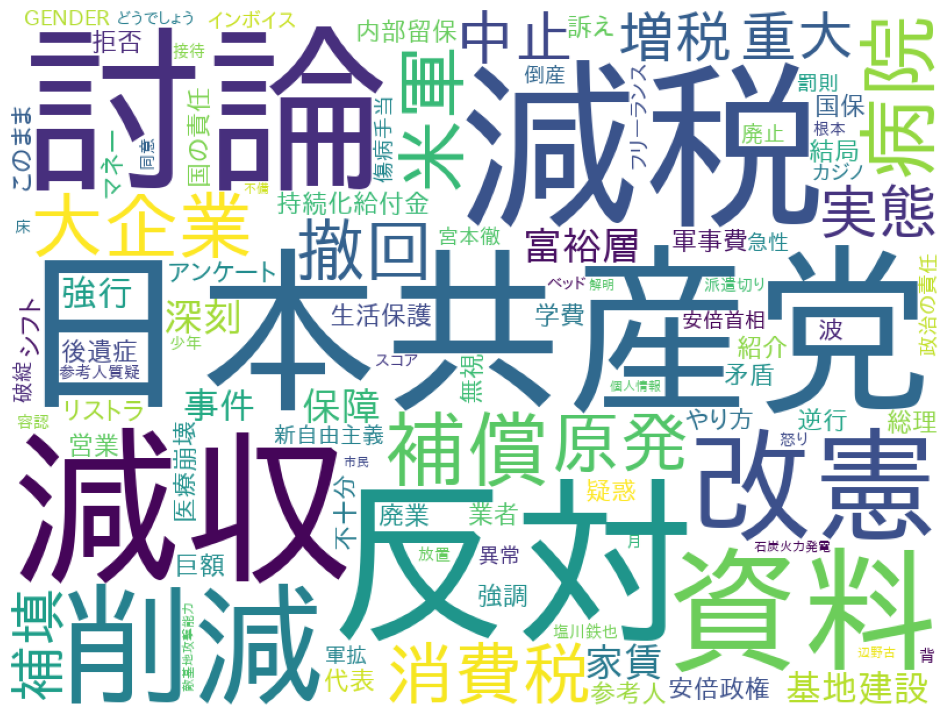

In [27]:
plot_wordcloud(discriminating_words(x,y).sort_values().head(100))#日本共産党

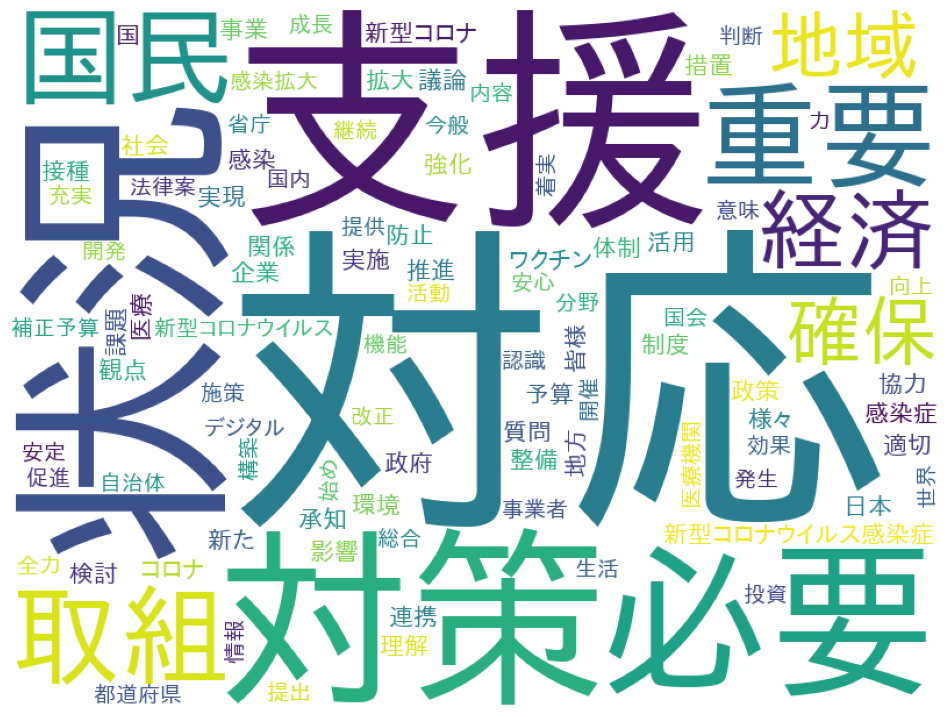

In [28]:
plot_wordcloud(discriminating_words(x,y).sort_values(ascending = False).head(100))#自民党

## 文書単語行列とCountVectorizer
- テキスト分析ではbag of wordsモデルに基づいて、文書単語行列を作成することが多い。
- 文書単語行列は、文書ごとに単語の頻度を記録した文ベクトルを縦に並べたものである。
<img src="https://raw.githubusercontent.com/berutaki/github.io/main/3-3.png" width="500">
- PythonではsklearnのCountVectorizerを用いて作成することができる。
- 分かち書きデータはスペース区切りのリストとして渡す。
- 日本語の場合token_patternを別個指定してやる必要がある（デフォルトでは、一語からなる単語が削除される）。
- CountVectorizer()をfitして作り出したオブジェクトをtransformすると文書単語行列が作成される。
- ただし、メモリ節約のため文書単語行列は疎行列として格納される。toarray()で通常の行列に変換できる。

In [29]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

sample_bow = [['私', 'は', '今日', '大学', 'に', '行く', '、', 'あなた', 'に', '会う', 'た'],
              ['あなた', 'は', '昨日', '、', 'あなた', 'の', '犬', 'を', '散歩', 'する', 'た'],
              ['私', 'は', '昼', 'に', 'カレー', 'を', '食べる', 'て', '、', '授業', 'に', '出る', 'た','後', 'に', '、', '夜', 'ラーメン', 'を', '食べる', 'た']
               ]


In [30]:
sample_bow

[['私', 'は', '今日', '大学', 'に', '行く', '、', 'あなた', 'に', '会う', 'た'],
 ['あなた', 'は', '昨日', '、', 'あなた', 'の', '犬', 'を', '散歩', 'する', 'た'],
 ['私',
  'は',
  '昼',
  'に',
  'カレー',
  'を',
  '食べる',
  'て',
  '、',
  '授業',
  'に',
  '出る',
  'た',
  '後',
  'に',
  '、',
  '夜',
  'ラーメン',
  'を',
  '食べる',
  'た']]

In [31]:
sample_bow = [" ".join(item) for item in sample_bow]
sample_bow

['私 は 今日 大学 に 行く 、 あなた に 会う た',
 'あなた は 昨日 、 あなた の 犬 を 散歩 する た',
 '私 は 昼 に カレー を 食べる て 、 授業 に 出る た 後 に 、 夜 ラーメン を 食べる た']

In [32]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

sample_bow = [['私', 'は', '今日', '大学', 'に', '行く', '、', 'あなた', 'に', '会う', 'た'],
              ['あなた', 'は', '昨日', '、', 'あなた', 'の', '犬', 'を', '散歩', 'する', 'た'],
              ['私', 'は', '昼', 'に', 'カレー', 'を', '食べる', 'て', '、', '授業', 'に', '出る', 'た','後', 'に', '、', '夜', 'ラーメン', 'を', '食べる', 'た']
               ]
sample_bow = [" ".join(item) for item in sample_bow]
# CountVectorizer

vc = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

# ベクトル化
vc.fit(sample_bow)
X = vc.transform(sample_bow)

CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [33]:
X.shape

(3, 24)

In [34]:
pd.options.display.max_columns = 100
dtm = pd.DataFrame(X.toarray(), columns=vc.get_feature_names_out())
dtm

,あなた,する,た,て,に,の,は,を,カレー,ラーメン,今日,会う,出る,夜,大学,後,授業,散歩,昨日,昼,犬,私,行く,食べる
0,1,0,1,0,2,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0
1,2,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
2,0,0,2,1,3,0,1,2,1,1,0,0,1,1,0,1,1,0,0,1,0,1,0,2


## CountVectorizerによる頻度分析と単語頻度の時系列推移の可視化
- CountVectorizer()で文書単語行列を作る。
- ただし、普通の行列に変換するとメモリを大量に消費するため、min_dfで最低文書出現数を設定する。
- 文書単語行列の行ごとに総和をとれば単語ごとの頻度が計算できる。

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

bow_space =  [" ".join(item) for item in bow]
vc = CountVectorizer(min_df=10, token_pattern='(?u)\\b\\w+\\b')

# ベクトル化
vc.fit(bow_space)
X = vc.transform(bow_space)
X.shape

CountVectorizer(min_df=10, token_pattern='(?u)\\b\\w+\\b')

(38657, 16319)

In [36]:
dtm = pd.DataFrame(X.toarray(), columns=vc.get_feature_names_out())
freq = dtm.sum(axis=0).sort_values(ascending = False)
freq[:100]


必要              27073
支援              26975
対応              26730
状況              26010
対策              24163
コロナ             22264
国民              17492
政府              17480
日本              14377
影響              14283
国               14150
問題              14102
質問              13904
感染              13785
地域              13672
重要              13574
確保              13525
ワクチン            12597
制度              11931
事業              11561
取組              11420
医療              11327
体制              11248
新型コロナウイルス感染症    11241
経済              10901
検討              10725
議論              10550
総理              10473
関係              10238
実施              10135
措置               9793
課題               9402
接種               9334
新型コロナ            9274
コロナ禍             9182
強化               8883
予算               8734
活用               8611
事業者              8574
検査               8477
感染症              8327
自治体              8297
新型コロナウイルス        8053
様々               8025
拡大               7977
連携        

In [37]:
freq = dtm.iloc[dat.query('speakerGroup2=="自由民主党"').index].sum(axis=0).sort_values(ascending = False)
freq

対応          12583
支援          11164
必要           9840
対策           9810
状況           9371
            ...  
サ高住             0
地熱発電            0
三枚              0
リスクプレミアム        0
コンタクト           0
Length: 16319, dtype: int64

In [38]:
freq = dtm.iloc[dat.query('speakerGroup2=="日本共産党"').index].sum(axis=0).sort_values(ascending = False)
freq

コロナ     2042
必要      1819
支援      1645
問題      1525
政府      1459
        ... 
リスケ        0
毎朝         0
リタイア       0
毎度         0
浜口誠        0
Length: 16319, dtype: int64

### 単語頻度の時系列推移の可視化
- 時間に関わる変数を扱うにはdatetime変数に変換する。
- 年週の場合、dt.isocalendar().year()とdt.isocalendar().week()でそれぞれ、年と週の情報を取得できる。いったんstに戻して、再びdatimeに変換する。
- 年月の場合、dt.to_period('M')で取得できるがperiodではplotlyで使えないのでstrに戻す。
- 単語文書行列から単語の頻度データを取得し、データフレームに加える。
- groupbyで年週（年月）と政党ごとにsumをしてプロット。


In [44]:
type(dat['date'].values[0])

str

In [45]:
dat['date'] = pd.to_datetime(dat['date'])


In [46]:
dat['date']

0       2023-04-13
1       2023-04-13
2       2023-04-13
3       2023-04-13
4       2023-04-13
           ...    
38652   2020-01-23
38653   2020-01-23
38654   2020-01-23
38655   2020-01-23
38656   2020-01-17
Name: date, Length: 38657, dtype: datetime64[ns]

In [48]:
dat['date'].dt.isocalendar().week

0        15
1        15
2        15
3        15
4        15
         ..
38652     4
38653     4
38654     4
38655     4
38656     3
Name: week, Length: 38657, dtype: UInt32

In [49]:
dat['year_week'] = dat['date'].dt.isocalendar().year.astype(str) + '-W' + dat['date'].dt.isocalendar().week.astype(str)
dat['year_week']

0        2023-W15
1        2023-W15
2        2023-W15
3        2023-W15
4        2023-W15
           ...   
38652     2020-W4
38653     2020-W4
38654     2020-W4
38655     2020-W4
38656     2020-W3
Name: year_week, Length: 38657, dtype: object

In [50]:
dat['year_week'] =  pd.to_datetime(dat['year_week'] + '-1', format='%Y-W%W-%w')
dat['year_week']

0       2023-04-10
1       2023-04-10
2       2023-04-10
3       2023-04-10
4       2023-04-10
           ...    
38652   2020-01-27
38653   2020-01-27
38654   2020-01-27
38655   2020-01-27
38656   2020-01-20
Name: year_week, Length: 38657, dtype: datetime64[ns]

In [51]:
dat['date'].dt.to_period('M').astype(str)

0        2023-04
1        2023-04
2        2023-04
3        2023-04
4        2023-04
          ...   
38652    2020-01
38653    2020-01
38654    2020-01
38655    2020-01
38656    2020-01
Name: date, Length: 38657, dtype: object

In [ ]:
# date列をdatetime型に変換
dat['date'] = pd.to_datetime(dat['date'])
# 年週の情報を新しい列に追加
dat['year_week'] = dat['date'].dt.isocalendar().year.astype(str) + '-W' + dat['date'].dt.isocalendar().week.astype(str)
dat['year_week'] =  pd.to_datetime(dat['year_week'] + '-1', format='%Y-W%W-%w')

# 年月の情報を新しい列に追加
dat['year_month'] = dat['date'].dt.to_period('M').astype(str)



In [52]:
dat['ワクチン'] = dtm['ワクチン']


In [53]:
dat.head()

,speechID,issueID,imageKind,searchObject,session,nameOfHouse,nameOfMeeting,issue,date,closing,speechOrder,speaker,speakerYomi,speakerGroup,speakerPosition,speakerRole,speech,startPage,speechURL,meetingURL,pdfURL,bow,speakerGroup2,year_week,ワクチン
0,121104601X01020230413_038,121104601X01020230413,会議録,38,211,衆議院,総務委員会,第10号,2023-04-13,NaN,38,中司宏,なかつかひろし,日本維新の会,NaN,NaN,○中司委員 考え方はよく分かりました。よろしくお願いいたします。\n そこで、オンラインによ...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[オンライン, 議会, 参画, 多様, 人材, 確保, 重要, テーマ, 地方公共団体, デ...",日本維新の会,2023-04-10,0
1,121104601X01020230413_099,121104601X01020230413,会議録,99,211,衆議院,総務委員会,第10号,2023-04-13,NaN,99,おおつき紅葉,おおつきくれは,立憲民主党・無所属,NaN,NaN,○おおつき委員 一人の議員の不祥事による補欠選挙で二億円以上のお金がかかる。これは、ちゃんと...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[一人, 不祥事, 補欠選挙, 2億円, お金, 有権者, 理解, 補欠選挙, 物価高, 選...",立憲民主党,2023-04-10,0
2,121104601X01020230413_119,121104601X01020230413,会議録,119,211,衆議院,総務委員会,第10号,2023-04-13,NaN,119,西岡秀子,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 今の御答弁の中でございましたけれども、各地域、選挙管理委員会においては様々なお取...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[地域, 選挙管理委員会, 様々, 取組, 取組, 財政, 質問, 3年, 新型コロナウイル...",その他,2023-04-10,0
3,121104601X01020230413_123,121104601X01020230413,会議録,123,211,衆議院,総務委員会,第10号,2023-04-13,NaN,123,西岡秀子,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 続きまして、更なる質問になりますけれども、地方議会におけるオンライン開催への取組...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[更, 質問, 地方議会, オンライン, 開催, 取組, 今年2月, 総務省, 本会議, 質...",その他,2023-04-10,0
4,121104601X01020230413_129,121104601X01020230413,会議録,129,211,衆議院,総務委員会,第10号,2023-04-13,NaN,129,西岡秀子,にしおかひでこ,国民民主党・無所属クラブ,NaN,NaN,○西岡委員 引き続きの待遇改善、処遇改善に是非御尽力いただきたいと思います。\n 最後の質問...,0,https://kokkai.ndl.go.jp/txt/121104601X0102023...,https://kokkai.ndl.go.jp/txt/121104601X0102023...,NaN,"[待遇改善, 処遇, 改善, 是非, 尽力, 質問, 地方公務員, 定例, 業務, コロナ,...",その他,2023-04-10,0


In [54]:
dat['ワクチン'] = dtm['ワクチン']
dat_count = dat.groupby(['year_week','speakerGroup2'])['ワクチン'].sum().reset_index()

In [55]:
dat_count

,year_week,speakerGroup2,ワクチン
0,2020-01-20,日本維新の会,0
1,2020-01-27,その他,1
2,2020-01-27,日本維新の会,0
3,2020-01-27,自由民主党,1
4,2020-02-03,その他,0
...,...,...,...
635,2023-04-03,自由民主党,2
636,2023-04-10,その他,0
637,2023-04-10,日本維新の会,1
638,2023-04-10,立憲民主党,20


In [56]:
import plotly.express as px
px.line(dat_count, x = 'year_week', y = 'ワクチン',color = 'speakerGroup2', markers = True)


In [57]:
dat['副反応'] = dtm['副反応']
dat_count = dat.groupby(['year_week','speakerGroup2'])['副反応'].sum().reset_index()
px.line(dat_count, x = 'year_week', y = '副反応',color = 'speakerGroup2', markers = True)


In [65]:
dat[(dat.year_week=='2020-11-30')&(dat.speakerGroup2=="その他")&(dat['副反応']>0)].speech

24846    ○参考人（脇田隆字君）　国立感染症研究所の所長をしております脇田と申します。\n　新型コロナ...
24847    ○参考人（坂元昇君）　川崎市健康福祉局医務監の坂元昇でございます。この度、当審議会にお呼びい...
24848    ○参考人（隈本邦彦君）　よろしくお願いします。\n　元ＮＨＫ記者で、現在、江戸川大学の教員を...
24849    ○参考人（片山和彦君）　私は、北里大学大村智記念研究所ウイルス感染制御学の教授をしております...
24854    ○参考人（脇田隆字君）　お答えいたします。\n　接種開始後のモニタリングということですけれど...
24857    ○参考人（片山和彦君）　まず、今流行しているウイルスについてお話しします。\n　日本で流行し...
24861    ○参考人（脇田隆字君）　お答えしたいと思います。\n　新型コロナウイルス感染症の対策において...
24862    ○参考人（坂元昇君）　予防接種台帳は、現在、多くの自治体で電子化されております。ただ、これは...
25151    ○塩田博昭君　次に、全国民が対象となる中で、副反応疑いの報告体制についてお伺いをしたいと思い...
25152    ○政府参考人（正林督章君）　新型コロナワクチンは、承認後に短期間で多くの方に接種される可能性...
25160    ○政府参考人（正林督章君）　新型コロナの予防接種の実施方法については、迅速かつ円滑に実施でき...
25173    ○田村まみ君　大臣、本当にこの部分に関しては、本当に見解が明るい方なので、是非、一番は、私自...
25174    ○政府参考人（正林督章君）　現状、副反応と疑われる症状の発生を把握した場合には、医師や製造販...
25175    ○政府参考人（正林督章君）　確かに今まではファクスで報告いただく形でしたが、ＰＭＤＡでは報告...
Name: speech, dtype: object

### 課題
- 自分で収集したデータの頻度分析、識別語分析、単語の時系列推移の可視化などを行ってみましょう。